# Pymaceuticals Inc.
---

### Analysis

- Capomulin exhibits a strong correlation between the weight of the mouse and the average tumor volume based on a value of 0.84.
- Based on this study, Capomulin and Ramicane appear to be more effective in shrinking tumors than Infubinol and Ceftamin.
- The data from this study is reliable as only a single outlier was identified.
- Ramicane and Infubinol possess the most symmetrical data as demonstrated through their respective box and whisker charts.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
study_df = study_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

# Display the data table for preview
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [2]:
# Checking the number of mice.
unique_mice = study_df['Mouse ID'].unique()
unique_mice_count = len(unique_mice)
unique_mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_dup_ids = study_df.loc[study_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
mice_dup_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
mice_dups_df = study_df.loc[study_df['Mouse ID'] == 'g989']
mice_dups_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_df = study_df[study_df['Mouse ID'].isin(mice_dups_df['Mouse ID']) == False]
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice = study_df['Mouse ID'].unique()
unique_mice_count = len(unique_mice)
unique_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_vol = study_df['Tumor Volume (mm3)'].groupby(study_df['Drug Regimen']).mean()
median_tumor_vol = study_df['Tumor Volume (mm3)'].groupby(study_df['Drug Regimen']).median()
tumor_vol_var = study_df['Tumor Volume (mm3)'].groupby(study_df['Drug Regimen']).var()
tumor_vol_sd = study_df['Tumor Volume (mm3)'].groupby(study_df['Drug Regimen']).std()
tumor_vol_sem = study_df['Tumor Volume (mm3)'].groupby(study_df['Drug Regimen']).sem()

study_stats_df = pd.DataFrame({'Mean Tumor Volume':mean_tumor_vol, 
                                'Median Tumor Volume':median_tumor_vol, 
                                'Tumor Variance':tumor_vol_var, 
                                'Tumor Volume Std Dev.':tumor_vol_sd, 
                                'Tumor Volume Std. Err.':tumor_vol_sem})

study_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Variance,Tumor Volume Std Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_study_stats_df = study_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_study_stats_df.rename(columns = {'mean':'Mean Tumor Volume', 'median':'Median Tumor Volume', 'var':'Tumor Variance', 'std':'Tumor Volume Std Dev.', 'sem':'Tumor Volume Std. Err.'}, inplace=True)
agg_study_stats_df

Tumor Volume (mm3)                                     \
              Mean Tumor Volume Median Tumor Volume Tumor Variance   
Drug Regimen                                                         
Capomulin             40.675741           41.557809      24.947764   
Ceftamin              52.591172           51.776157      39.290177   
Infubinol             52.884795           51.820584      43.128684   
Ketapril              55.235638           53.698743      68.553577   
Naftisol              54.331565           52.509285      66.173479   
Placebo               54.033581           52.288934      61.168083   
Propriva              52.320930           50.446266      43.852013   
Ramicane              40.216745           40.673236      23.486704   
Stelasyn              54.233149           52.431737      59.450562   
Zoniferol             53.236507           51.818479      48.533355   

                                                           
             Tumor Volume Std Dev. Tumor Volume Std. Err.  
Drug Regimen                                               
Capomulin                 4.994774               0.329346  
Ceftamin                  6.268188               0.469821  
Infubinol                 6.567243               0.492236  
Ketapril                  8.279709               0.603860  
Naftisol                  8.134708               0.596466  
Placebo                   7.821003               0.581331  
Propriva                  6.622085               0.544332  
Ramicane                  4.846308               0.320955  
Stelasyn                  7.710419               0.573111  
Zoniferol                 6.966589               0.516398

## Bar and Pie Charts

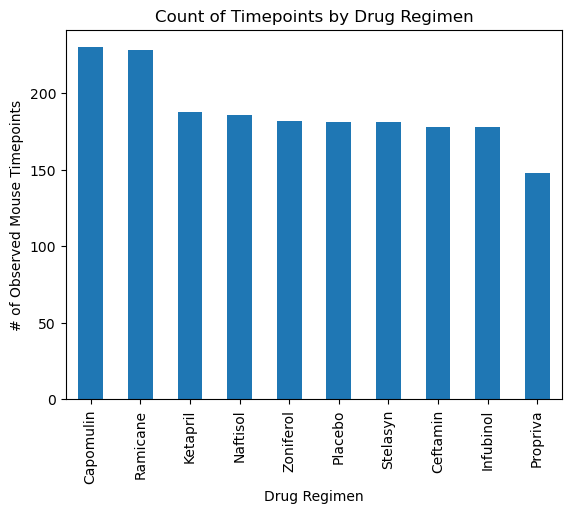

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
tests_count = study_df.groupby(['Drug Regimen']).size().sort_values(ascending=False)

x_axis = 'Drug Regimen'
y_axis = '# of Observed Mouse Timepoints'
title = 'Count of Timepoints by Drug Regimen'

plt.title(title)
plt.xlabel(x_axis)
plt.ylabel(y_axis)

tests_count.plot.bar()

plt.savefig('barchart_pandas.png')

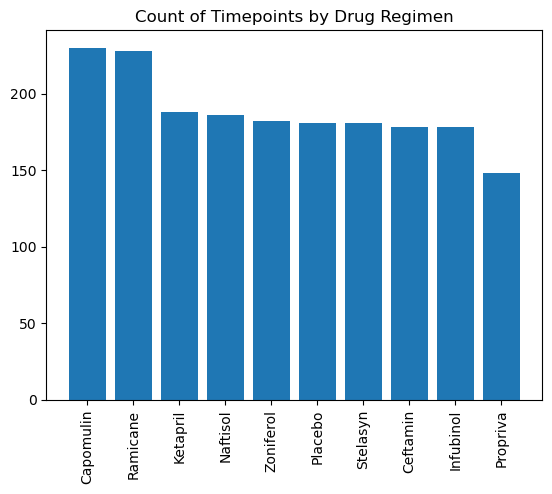

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = tests_count.index.values
y_axis = tests_count.values
title = 'Count of Timepoints by Drug Regimen'

plt.title(title)
plt.bar(x_axis, y_axis)#, color='blue', alpha=0.5, align='center')
plt.xticks(rotation=90)

plt.savefig('barchart_pyplot.png')

plt.show()

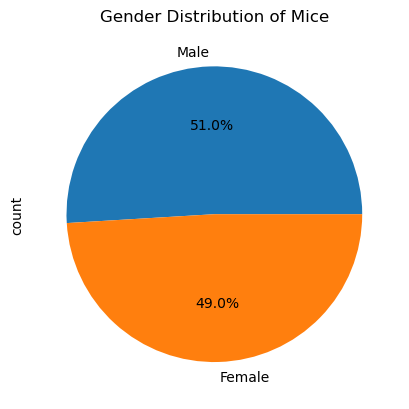

In [21]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
title = 'Gender Distribution of Mice'

# Get the unique mice with their gender
mouse_gender_counts = study_df['Sex'].value_counts()

# Make the pie chart
mouse_gender_counts.plot.pie(autopct='%1.1f%%')
plt.title(title)
plt.savefig('piechart_pandas.png')
plt.show()

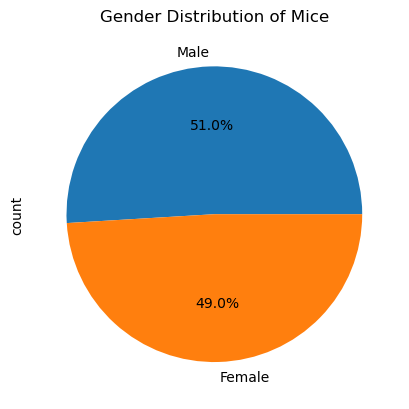

In [22]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
title = 'Gender Distribution of Mice'

# Get the unique mice with their gender
labels = study_df['Sex'].unique()

# Make the pie chart
plt.title(title)
plot = mouse_gender_counts.plot.pie(y='count', autopct='%1.1f%%')
plt.savefig('piechart_pyplot.png')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = []

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
for mouse in unique_mice:
    last_index = study_df.loc[study_df['Mouse ID'] == mouse,:].idxmax()
    last_timepoint.append(last_index['Timepoint'])

last_timepoint = list(study_df.loc[i,['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']] for i in last_timepoint)
last_timepoint = pd.DataFrame(data=last_timepoint)
last_timepoint

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
9,k403,Ramicane,22.050126
19,s185,Capomulin,23.343598
29,x401,Capomulin,28.484033
39,m601,Capomulin,28.430964
49,g791,Ramicane,29.128472
...,...,...,...
1859,z314,Stelasyn,45.934712
1862,z435,Propriva,48.710661
1872,z581,Infubinol,62.754451
1882,z795,Naftisol,65.741070


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []
outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    last_timepoint_by_drug = last_timepoint.loc[last_timepoint['Drug Regimen']==regimen,:]
    tumor_vols.append(last_timepoint_by_drug['Tumor Volume (mm3)'])
    
    # add subset
    tumor_vol_check = last_timepoint_by_drug['Tumor Volume (mm3)']
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_check.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outlier_vol = tumor_vol_check[(tumor_vol_check < lower_bound) | (tumor_vol_check > upper_bound)]

    print(f"{regimen}'s potential outliers: Name: {regimen}, Tumor Volume (mm3): {outlier_vol}")
    
#    last_timepoint_by_drug = last_timepoint_by_drug.loc[:,'Tumor Volume (mm3)']
#    final_vol.append(last_timepoint_by_drug)

Capomulin's potential outliers: Name: Capomulin, Tumor Volume (mm3): Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Name: Ramicane, Tumor Volume (mm3): Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Name: Infubinol, Tumor Volume (mm3): 669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Name: Ceftamin, Tumor Volume (mm3): Series([], Name: Tumor Volume (mm3), dtype: float64)


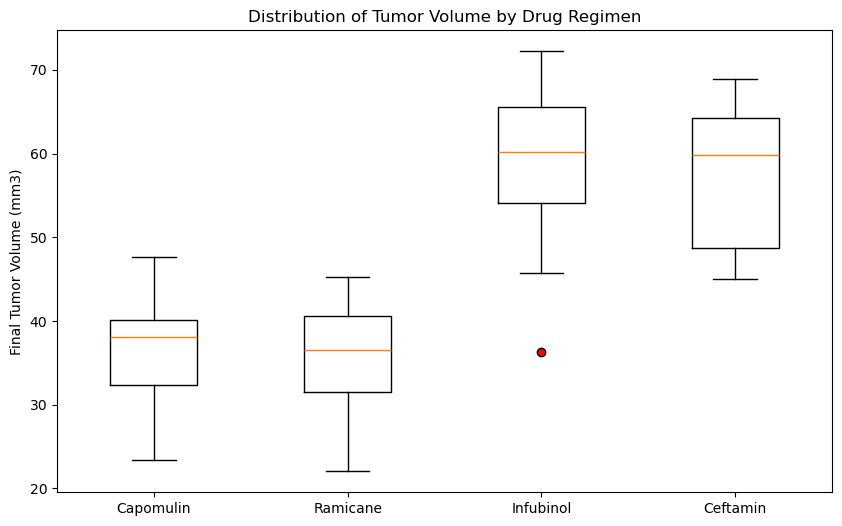

In [23]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
title = 'Distribution of Tumor Volume by Drug Regimen'
fig, ax = plt.subplots(figsize=(10,6))
plt.boxplot(tumor_vols, labels=regimens, flierprops = dict(marker='o', markerfacecolor='red'))
ax.set(ylabel='Final Tumor Volume (mm3)')
plt.title(title)
plt.savefig('box_whisker_chart.png')
plt.show()

## Line and Scatter Plots

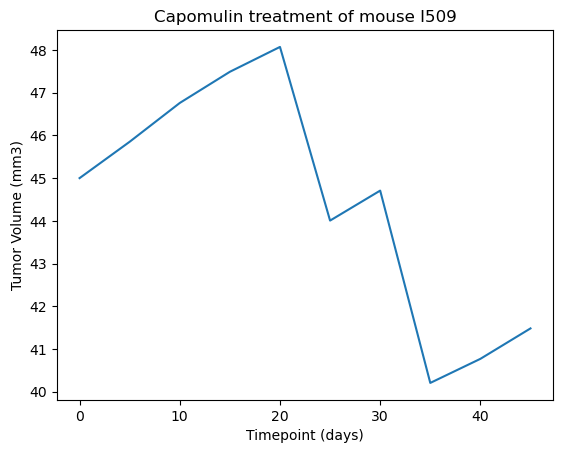

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse_i509 = study_df.loc[study_df['Mouse ID'] == "l509"]

plt.title('Capomulin treatment of mouse I509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(capomulin_mouse_i509['Timepoint'], capomulin_mouse_i509['Tumor Volume (mm3)'])
plt.savefig('linechart_capo_l509.png')
plt.show()

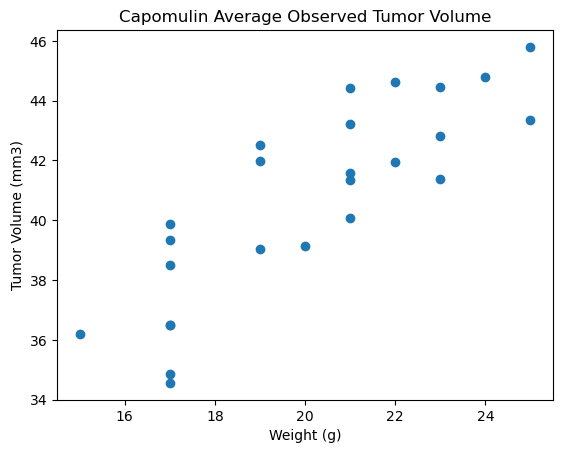

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg_tumor_vol = study_df[study_df['Drug Regimen'] == 'Capomulin']
capomulin_avg_tumor_vol = capomulin_avg_tumor_vol.groupby('Mouse ID').mean('Tumor Volume (mm3)')
title = 'Capomulin Average Observed Tumor Volume'

plt.title(title)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.scatter(capomulin_avg_tumor_vol['Weight (g)'], capomulin_avg_tumor_vol['Tumor Volume (mm3)'])
plt.savefig('scatterchart_capo_tumorvol.png')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


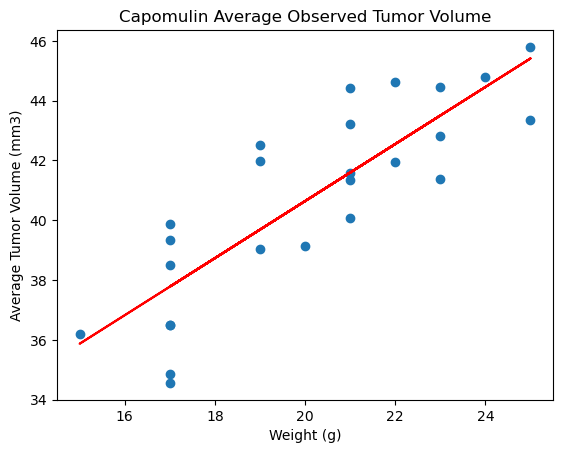

In [26]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = capomulin_avg_tumor_vol['Weight (g)']
y_values = capomulin_avg_tumor_vol['Tumor Volume (mm3)']

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

title = 'Capomulin Average Observed Tumor Volume'
plt.title(title)
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,'r-')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('scatterchart_capo_tumorvol_linreg.png')
plt.show()